In [16]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [17]:
#Constants
G = 6.67430*10**(-11)
EM_DIST = 3.84*10**8
E_MASS = 5.9*10**24
V_0 = 10**3

In [18]:
planet_count = 4

pos_planet0 = [-EM_DIST,0,0]
pos_planet1 = [0,EM_DIST,0]
pos_planet2 = [EM_DIST,0,0]
pos_planet3 = [0,-EM_DIST,0]

vel_planet0 = [0,-V_0,0]
vel_planet1 = [-V_0,0,0]
vel_planet2 = [0,V_0,0]
vel_planet3 = [V_0,0,0]

mass_planet0 = E_MASS
mass_planet1 = E_MASS
mass_planet2 = E_MASS
mass_planet3 = E_MASS

In [19]:
pos_planet_list = [pos_planet0, pos_planet1, pos_planet2, pos_planet3]
vel_planet_list = [vel_planet0, vel_planet1, vel_planet2, vel_planet3]
mass_planet_list = [mass_planet0, mass_planet1, mass_planet2, mass_planet3]

In [20]:
planet_info_dict = {}

for i in range(planet_count):
    planet_number = i
    planet_info_dict[planet_number] = {}
    planet_info_dict[planet_number]['pos'] = pos_planet_list[i]
    planet_info_dict[planet_number]['vel'] = vel_planet_list[i]
    planet_info_dict[planet_number]['acc'] = [0,0,0]
    planet_info_dict[planet_number]['mass'] = mass_planet_list[i]

In [21]:
print(planet_info_dict)

{0: {'pos': [-384000000.0, 0, 0], 'vel': [0, -1000, 0], 'acc': [0, 0, 0], 'mass': 5.9e+24}, 1: {'pos': [0, 384000000.0, 0], 'vel': [-1000, 0, 0], 'acc': [0, 0, 0], 'mass': 5.9e+24}, 2: {'pos': [384000000.0, 0, 0], 'vel': [0, 1000, 0], 'acc': [0, 0, 0], 'mass': 5.9e+24}, 3: {'pos': [0, -384000000.0, 0], 'vel': [1000, 0, 0], 'acc': [0, 0, 0], 'mass': 5.9e+24}}


In [22]:
# For loop to simulate frames
information_dict = {}

der_names = ["pos","vel","acc"]
for i in range(planet_count):
    information_dict[i] = {}
    
    for j in range(3):
        information_dict[i][der_names[j]] = []
        information_dict[i][der_names[j]].append(planet_info_dict[i][der_names[j]])

In [23]:
simulation_length = 10**6 # Each frame represents 1 second
print(f'Days:{simulation_length/60/60/24}')

Days:11.574074074074074


In [24]:
print(information_dict)
for i in range(planet_count):
    del planet_info_dict[i]['mass']
print(planet_info_dict)

{0: {'pos': [[-384000000.0, 0, 0]], 'vel': [[0, -1000, 0]], 'acc': [[0, 0, 0]]}, 1: {'pos': [[0, 384000000.0, 0]], 'vel': [[-1000, 0, 0]], 'acc': [[0, 0, 0]]}, 2: {'pos': [[384000000.0, 0, 0]], 'vel': [[0, 1000, 0]], 'acc': [[0, 0, 0]]}, 3: {'pos': [[0, -384000000.0, 0]], 'vel': [[1000, 0, 0]], 'acc': [[0, 0, 0]]}}
{0: {'pos': [-384000000.0, 0, 0], 'vel': [0, -1000, 0], 'acc': [0, 0, 0]}, 1: {'pos': [0, 384000000.0, 0], 'vel': [-1000, 0, 0], 'acc': [0, 0, 0]}, 2: {'pos': [384000000.0, 0, 0], 'vel': [0, 1000, 0], 'acc': [0, 0, 0]}, 3: {'pos': [0, -384000000.0, 0], 'vel': [1000, 0, 0], 'acc': [0, 0, 0]}}


In [25]:
def calc_gravF(mass_list, pos_list): # mass_list = [m1,m2,m3], pos_list = [[x1,x2,x3], ... ,[x1,x2,x3]]
    
    force_vector_dict = {}
    for i in range(len(mass_list)):

        net_x_force = 0
        net_y_force = 0
        net_z_force = 0

        for j in range(len(mass_list)):
            if i == j:
                continue

            posA = pos_list[i]
            posB = pos_list[j]
            
            x_dist = posB[0] - posA[0]
            y_dist = posB[1] - posA[1]
            z_dist = posB[2] - posA[2]            
            
            ABdist = math.sqrt((x_dist)**2 + (y_dist)**2 + (z_dist)**2)
            ABforce_mag = G*mass_list[i]*mass_list[j]/(ABdist**2)
            
            net_x_force += ABforce_mag/ABdist*(x_dist)
            net_y_force += ABforce_mag/ABdist*(y_dist)
            net_z_force += ABforce_mag/ABdist*(z_dist)
            
        force_vector_dict[i] = [net_x_force, net_y_force, net_z_force]

    acc_vector_dict = {}
    for i in range(len(mass_list)):
        acc_vector_dict[i] = [force_vector_dict[i][0] / mass_list[i],
                              force_vector_dict[i][1] / mass_list[i],
                              force_vector_dict[i][2] / mass_list[i]] 
    
    return acc_vector_dict # = {0:[ax,ay,az], ... ,n:[ax,ay,az]}

In [26]:
temp = 0

for frame in range(simulation_length):

    for i in range(planet_count):
        for j in range(len(der_names)):
            if j == 2:
                break
            planet_info_dict[i][der_names[j]] = [x + y for x, y in zip(planet_info_dict[i][der_names[j]], planet_info_dict[i][der_names[j+1]])]
        planet_info_dict[i]['acc'] = [0,0,0]

    pos_list = []
    for i in range(planet_count):
        pos_list.append(planet_info_dict[i]['pos'])

    acc_vec_dict = calc_gravF(mass_planet_list, pos_list)
    for i in range(planet_count):
        planet_info_dict[i]['acc'] = acc_vec_dict[i]
    
    for i in range(planet_count):
        for j in range(len(der_names)):
            information_dict[i][der_names[j]].append(planet_info_dict[i][der_names[j]])

    if frame % (simulation_length/10) == 0:
        print(f'Percent done: {temp*10}% Frame: {frame}')
        temp += 1
print(f'Percent done: 100% Frame: {simulation_length}')

Percent done: 0% Frame: 0
Percent done: 10% Frame: 100000
Percent done: 20% Frame: 200000
Percent done: 30% Frame: 300000
Percent done: 40% Frame: 400000
Percent done: 50% Frame: 500000
Percent done: 60% Frame: 600000
Percent done: 70% Frame: 700000
Percent done: 80% Frame: 800000
Percent done: 90% Frame: 900000
Percent done: 100% Frame: 1000000


In [27]:
x_y_dicts = {}
for i in range(planet_count):
    x_y_dicts[i] = [[],[]]

for i in range(planet_count):
    for j in range(len(information_dict[i]['pos'])):
        x_y_dicts[i][0].append(information_dict[i]['pos'][j][0])
        x_y_dicts[i][1].append(information_dict[i]['pos'][j][1])
    

In [28]:
percent = .95
set_max = int(percent*len(x_y_dicts[0][0]))
print(set_max, len(x_y_dicts[0][0]))

950000 1000001


c:\SZvsWorkspace\PersonalProjects\Grav_Sim\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


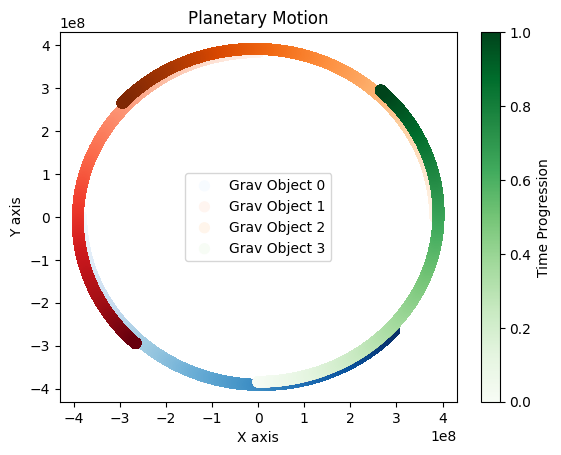

In [29]:
color_list = ['Blues','Reds','Oranges','Greens']


for i in range(planet_count):
    time = np.linspace(0, 1, set_max)
    plt.scatter(x_y_dicts[i][0][0:set_max], x_y_dicts[i][1][0:set_max], c=time, cmap=color_list[i], label=f'Grav Object {i}', s=50)

plt.colorbar(label='Time Progression')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Planetary Motion')
plt.legend()
plt.show()

In [30]:
for frame in range(simulation_length):
    if information_dict['p1']['pos'][frame][0] > information_dict['p2']['pos'][frame][0]:
        x_position_of_crossover = (information_dict['p2']['pos'][frame-1][0] + information_dict['p1']['pos'][frame-1][0])/2
        y_position_of_crossover = (information_dict['p2']['pos'][frame-1][1] + information_dict['p1']['pos'][frame-1][1])/2
        print(f'+=+= Collision Data =+=+\nFrame: {frame}\nTime: {round(frame/60/60/24,4)} Days\nIntersection Position: ({"{:e}".format(x_position_of_crossover)},{"{:e}".format(y_position_of_crossover)}) Meters')
        break

KeyError: 'p1'

In [9]:
percent = .95
set_max = int(percent*len(x1_pos))

In [ ]:
time1 = np.linspace(0, 1, int(percent*len(x1_pos)))
time2 = np.linspace(0, 1, int(percent*len(x2_pos)))

plt.scatter(x1_pos[0:set_max], y1_pos[0:set_max], c=time1, cmap='Blues', label='Grav Object 1', s=50)
plt.scatter(x2_pos[0:set_max], y2_pos[0:set_max], c=time2, cmap='Reds', label='Grav Object 2', s=50)

plt.colorbar(label='Time Progression')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Planetary Motion')
plt.legend()
plt.show()

In [ ]:
plt.plot(x1_pos, y1_pos)

In [ ]:
plt.plot(x2_pos, y2_pos)